#Arthur Valls da Costa Silva (120177470)

#Julia Turazzi Almeida (120188861)

#Imports:

In [ ]:
import numpy as np
from scipy.linalg import solve
from numpy import array, zeros, diag, diagflat, dot
import sys
import sympy as sym
import matplotlib.pyplot as plt
import math

#1.2

In [ ]:
# Método de Gauss
def eliminacao_gaussiana(A,b):
  n = A.shape[0]
  x = np.zeros(n)
  a = np.zeros((n, n+1))
  
  for i in range(n):
    a[:,i] = A[:,i]
  
  a[:,n] = b.T

  # eliminacao gaussiana
  for i in range(n):
      if a[i][i] == 0.0:
          sys.exit()
          
      for j in range(i+1, n):
          ratio = a[j][i]/a[i][i]
          
          for k in range(n+1):
              a[j][k] = a[j][k] - ratio * a[i][k]

  # retro-substituição
  x[n-1] = a[n-1][n]/a[n-1][n-1]

  for i in range(n-2,-1,-1):
      x[i] = a[i][n]
      
      for j in range(i+1,n):
          x[i] = x[i] - a[i][j]*x[j]
      
      x[i] = x[i]/a[i][i]

  return x

Substituindo pelas varíaveis fornecidas na questão, temos:

In [ ]:
U = 67967200 
K = 35 
L = 0.025 
T_infinito = 293.15 
h = 0.005 

# Para calcular a discretização:
n = L/ h

In [ ]:
b_var = ((-h**2) * (U/ K))

In [ ]:
# Função para solução analítica
def funcao_analitica(x):
  return T_infinito + ((U* (L**2))/ (2 * K)) * (1 - (x/ L)**2)

In [ ]:
# Matriz A
A = np.array([[-2, 2, 0, 0, 0], 
              [1, -2, 1 ,0, 0], 
              [0, 1, -2, 1, 0], 
              [0, 0, 1, -2, 1], 
              [0, 0, 0, 1, -2]])

In [ ]:
# Vetor B
b = np.array([b_var, b_var, b_var, b_var, 
              b_var - T_infinito])

In [ ]:
eliminacao_gaussiana(A, b)

array([900.   , 875.726, 802.904, 681.534, 511.616])

In [ ]:
solucao_analitica = [funcao_analitica(0), 
                     funcao_analitica(h), 
                     funcao_analitica(2 * h), 
                     funcao_analitica(3 * h), 
                     funcao_analitica(4 * h)]

In [ ]:
# Imprimindo a solução analítica
solucao_analitica

[900.0000000000001,
 875.7260000000001,
 802.9040000000002,
 681.5340000000001,
 511.6160000000001]

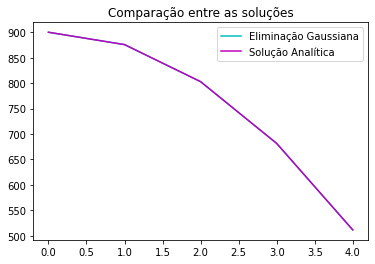

In [ ]:
# Plotando o gráfico de ambas as funções
plt.plot(eliminacao_gaussiana(A, b), '-c', linestyle ='solid', label = "Eliminação Gaussiana", markersize = 3)
plt.plot(solucao_analitica, '-m', linestyle ='solid', label = "Solução Analítica", markersize = 3)

plt.title('Comparação entre as soluções')
plt.legend()
plt.grid(False)


plt.show()

#1.3

Para ser possível calcular o erro, utilizaremos além da Eliminação Gaussiana, o Método de Gauss-Jacobi.

In [ ]:
# Método de Gauss-Jacobi 
def gauss_jacobi(A, b, n):
    
    x = zeros(len(A[0]))
    D = np.diag(A)
    R = A - np.diagflat(D)

    for i in range(n):
      x = (b - np.dot(R,x))/ D

    return x

In [ ]:
solucao_gj = gauss_jacobi(A, b, 300)

In [ ]:
solucao_gj

array([899.99970856, 875.72572816, 802.90376422, 681.53383199,
       511.61590994])

Calculando o erro relativo entre a solução analítica e o método de Gauss-Jacobi: 

In [ ]:
erro_rel1 = abs(solucao_gj[0] - solucao_analitica[0])/ abs(solucao_analitica[0])
erro_rel2 = abs(solucao_gj[1] - solucao_analitica[1])/ abs(solucao_analitica[1])
erro_rel3 = abs(solucao_gj[2] - solucao_analitica[2])/ abs(solucao_analitica[2])
erro_rel4 = abs(solucao_gj[3] - solucao_analitica[3])/ abs(solucao_analitica[3])
erro_rel5 = abs(solucao_gj[4] - solucao_analitica[4])/ abs(solucao_analitica[4])

In [ ]:
erro_relativo_total =[erro_rel1,
                      erro_rel2,
                      erro_rel3,
                      erro_rel4,
                      erro_rel5]

In [ ]:
erro_relativo_total

[3.238237827139932e-07,
 3.104209312956712e-07,
 2.9366032443178924e-07,
 2.465154111238068e-07,
 1.7603113840514054e-07]

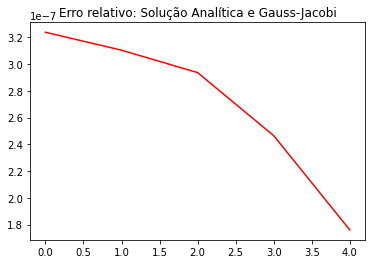

In [ ]:
# Plotando o gráfico do erro relativo
plt.plot(erro_relativo_total, '-r', linestyle ='solid', label = "Erro relativo", markersize = 3)

plt.title('Erro relativo: Solução Analítica e Gauss-Jacobi')
plt.grid(False)

plt.show()